In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import kernels as ker
import confidence_bounds as cb

In [6]:
params = {'legend.fontsize': 10,
         'axes.labelsize': 8,
         'axes.titlesize': 10,
         'xtick.labelsize': 8,
         'ytick.labelsize': 8}
pylab.rcParams.update(params)

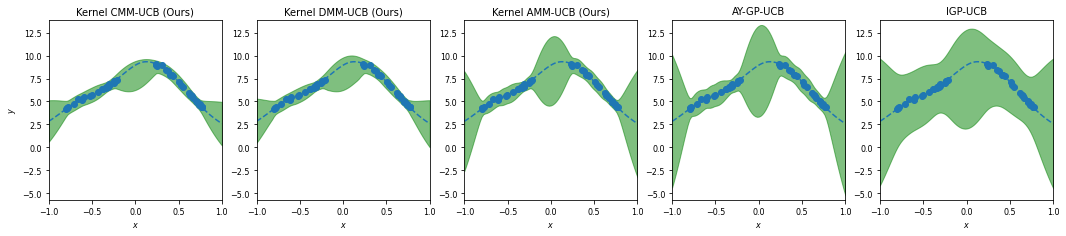

In [7]:
n = 50
d = 1
m = 20
B = 10.0
sigma = 0.1
eta = 2/n
nu = 3/2
# c = 1.0
c = 1.0*n**(-d/(2*nu + 2*d))
alphas = [0.1*sigma**2/c, 0.3*sigma**2/c, sigma**2/c, 3*sigma**2/c, 10*sigma**2/c]
delta = 0.01
eps = 1e-6

a = -1.0
b = 1.0
ls = 0.5

# kernel = ker.SquaredExponentialKernel(ls)
# kernel = ker.Matern12Kernel(ls)
kernel = ker.Matern32Kernel(ls)
# kernel = ker.Matern52Kernel(ls)

func = ker.RKHSFunc(kernel, a, b, d, m, B)

x1 = np.random.uniform(-0.8, -0.2, (n//2, 1))
x2 = np.random.uniform(0.2, 0.8, (n//2, 1))
x = np.concatenate((x1, x2), axis=0)
y = func(x) + np.random.normal(0.0, sigma, (n, 1))

x_eval = np.linspace(a, b, 101).reshape(-1, 1)
y_eval = func(x_eval)

cmm_lcbs, cmm_ucbs = cb.cmm_cbs(x_eval, x, y, kernel, c, sigma, B, delta, eps)
dmm_lcbs, dmm_ucbs = cb.dmm_cbs(x_eval, x, y, kernel, c, sigma, B, delta, alphas)
amm_lcbs, amm_ucbs = cb.amm_cbs(x_eval, x, y, kernel, c, sigma, B, delta)
agp_lcbs, agp_ucbs = cb.ay_gp_ucb_cbs(x_eval, x, y, kernel, c, sigma, B, delta)
igp_lcbs, igp_ucbs = cb.igp_ucb_cbs(x_eval, x, y, kernel, eta, sigma, B, delta)

y_max = max(np.max(igp_ucbs), np.max(agp_ucbs)) + 0.5
y_min = min(np.min(igp_lcbs), np.min(agp_lcbs)) - 0.5

fig, ax = plt.subplots(figsize=(18, 3.3), nrows=1, ncols=5)
ax[0].fill_between(x_eval.reshape(-1), cmm_ucbs.reshape(-1), cmm_lcbs.reshape(-1),
                   alpha=0.5, color='green')
ax[0].plot(x_eval, y_eval, ls='--')
ax[0].scatter(x, y)
ax[0].set_xlim([a, b])
ax[0].set_ylim([y_min, y_max])
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].set_title('Kernel CMM-UCB (Ours)')
ax[1].fill_between(x_eval.reshape(-1), dmm_ucbs.reshape(-1), dmm_lcbs.reshape(-1),
                   alpha=0.5, color='green')
ax[1].plot(x_eval, y_eval, ls='--')
ax[1].scatter(x, y)
ax[1].set_xlim([a, b])
ax[1].set_ylim([y_min, y_max])
ax[1].set_xlabel(r'$x$')
ax[1].set_title('Kernel DMM-UCB (Ours)')
ax[2].fill_between(x_eval.reshape(-1), amm_ucbs.reshape(-1), amm_lcbs.reshape(-1),
                   alpha=0.5, color='green')
ax[2].plot(x_eval, y_eval, ls='--')
ax[2].scatter(x, y)
ax[2].set_xlim([a, b])
ax[2].set_ylim([y_min, y_max])
ax[2].set_xlabel(r'$x$')
ax[2].set_title('Kernel AMM-UCB (Ours)')
ax[3].fill_between(x_eval.reshape(-1), agp_ucbs.reshape(-1), agp_lcbs.reshape(-1),
                   alpha=0.5, color='green')
ax[3].plot(x_eval, y_eval, ls='--')
ax[3].scatter(x, y)
ax[3].set_xlim([a, b])
ax[3].set_ylim([y_min, y_max])
ax[3].set_xlabel(r'$x$')
ax[3].set_title('AY-GP-UCB')
ax[4].fill_between(x_eval.reshape(-1), igp_ucbs.reshape(-1), igp_lcbs.reshape(-1),
                   alpha=0.5, color='green')
ax[4].plot(x_eval, y_eval, ls='--')
ax[4].scatter(x, y)
ax[4].set_xlim([a, b])
ax[4].set_xlabel(r'$x$')
ax[4].set_ylim([y_min, y_max])
ax[4].set_title('IGP-UCB')
# plt.savefig('figures/ucbs.pdf')
plt.show()